In [3]:
import sys
import os

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))




In [4]:
from src.data_loader import load_stock_data
filepath = (r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\META_historical_data.csv')
df_meta = load_stock_data(filepath)
print(df_meta.head())

✅ Pandas valid dates: 2926 / 2926
✅ Total valid after dateutil: 2926 / 2926
                  Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12 00:00:00  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13 00:00:00  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14 00:00:00  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17 00:00:00  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18 00:00:00  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0  


In [5]:
print("Null values count per column:")
print(df_meta.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [6]:
df_meta.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2926.0
mean,179.557215,181.875331,177.317761,179.649453,179.305921,2.872083e+07,0.000342,0.0
std,108.864895,110.256219,107.511134,108.906971,108.755055,2.269811e+07,0.013070,0.0
min,22.990000,23.090000,22.670000,22.900000,22.853037,5.467500e+06,0.000000,0.0
25%,97.767502,98.772499,95.889997,97.382498,97.182795,1.571308e+07,0.000000,0.0
50%,166.870003,168.850006,164.210007,166.855003,166.512825,2.176100e+07,0.000000,0.0
75%,231.450005,234.934998,228.687504,232.424999,231.948360,3.294468e+07,0.000000,0.0
max,542.349976,542.809998,528.359985,539.909973,539.909973,3.654579e+08,0.500000,0.0


In [7]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'META': df_meta,
}

print_all_date_ranges(stock_dfs)

META: 2012-12-12 to 2024-07-30


In [8]:
# Assume your DataFrame is called df_news
# AMETA headline date range: 2020-03-09 to 2020-06-10

df_meta_news = df_meta[
    (df_meta['Date'] >= '2020-02-19') &
    (df_meta['Date'] <= '2020-06-10')
]


In [9]:
from src.missing_date import find_missing_dates
missing_dates = find_missing_dates(
   df_meta,
    date_col='Date',
    start_date='2020-02-19',
    end_date='2020-06-10',
    freq='D'
)

print("Missing dates:")
print(missing_dates)
print(f"Total missing: {len(missing_dates)}")

Missing dates:
DatetimeIndex(['2020-02-22', '2020-02-23', '2020-02-29', '2020-03-01',
               '2020-03-07', '2020-03-08', '2020-03-14', '2020-03-15',
               '2020-03-21', '2020-03-22', '2020-03-28', '2020-03-29',
               '2020-04-04', '2020-04-05', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-18', '2020-04-19', '2020-04-25',
               '2020-04-26', '2020-05-02', '2020-05-03', '2020-05-09',
               '2020-05-10', '2020-05-16', '2020-05-17', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-30', '2020-05-31',
               '2020-06-06', '2020-06-07'],
              dtype='datetime64[ns]', freq=None)
Total missing: 34


In [10]:
from src.missing_date import download_missing_yfinance_data

download_missing_yfinance_data(missing_dates, ticker_symbol='META', show_empty=True)


$META: possibly delisted; no price data found  (1d 2020-02-22 00:00:00 -> 2020-02-23 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-02-23 00:00:00 -> 2020-02-24 00:00:00)


No data for 2020-02-22 00:00:00
No data for 2020-02-23 00:00:00


$META: possibly delisted; no price data found  (1d 2020-02-29 00:00:00 -> 2020-03-01 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-01 00:00:00 -> 2020-03-02 00:00:00)


No data for 2020-02-29 00:00:00
No data for 2020-03-01 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-07 00:00:00 -> 2020-03-08 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-08 00:00:00 -> 2020-03-09 00:00:00)


No data for 2020-03-07 00:00:00
No data for 2020-03-08 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-14 00:00:00 -> 2020-03-15 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-15 00:00:00 -> 2020-03-16 00:00:00)


No data for 2020-03-14 00:00:00
No data for 2020-03-15 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-21 00:00:00 -> 2020-03-22 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-22 00:00:00 -> 2020-03-23 00:00:00)


No data for 2020-03-21 00:00:00
No data for 2020-03-22 00:00:00


$META: possibly delisted; no price data found  (1d 2020-03-28 00:00:00 -> 2020-03-29 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-03-29 00:00:00 -> 2020-03-30 00:00:00)


No data for 2020-03-28 00:00:00
No data for 2020-03-29 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-04 00:00:00 -> 2020-04-05 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-04-05 00:00:00 -> 2020-04-06 00:00:00)


No data for 2020-04-04 00:00:00
No data for 2020-04-05 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-10 00:00:00 -> 2020-04-11 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-04-11 00:00:00 -> 2020-04-12 00:00:00)


No data for 2020-04-10 00:00:00
No data for 2020-04-11 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-12 00:00:00 -> 2020-04-13 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-04-18 00:00:00 -> 2020-04-19 00:00:00)


No data for 2020-04-12 00:00:00
No data for 2020-04-18 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-19 00:00:00 -> 2020-04-20 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-04-25 00:00:00 -> 2020-04-26 00:00:00)


No data for 2020-04-19 00:00:00
No data for 2020-04-25 00:00:00


$META: possibly delisted; no price data found  (1d 2020-04-26 00:00:00 -> 2020-04-27 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-05-02 00:00:00 -> 2020-05-03 00:00:00)


No data for 2020-04-26 00:00:00
No data for 2020-05-02 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-03 00:00:00 -> 2020-05-04 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-05-09 00:00:00 -> 2020-05-10 00:00:00)


No data for 2020-05-03 00:00:00
No data for 2020-05-09 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-10 00:00:00 -> 2020-05-11 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-05-16 00:00:00 -> 2020-05-17 00:00:00)


No data for 2020-05-10 00:00:00
No data for 2020-05-16 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-17 00:00:00 -> 2020-05-18 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-05-23 00:00:00 -> 2020-05-24 00:00:00)


No data for 2020-05-17 00:00:00
No data for 2020-05-23 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-24 00:00:00 -> 2020-05-25 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-05-25 00:00:00 -> 2020-05-26 00:00:00)


No data for 2020-05-24 00:00:00
No data for 2020-05-25 00:00:00


$META: possibly delisted; no price data found  (1d 2020-05-30 00:00:00 -> 2020-05-31 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-05-31 00:00:00 -> 2020-06-01 00:00:00)


No data for 2020-05-30 00:00:00
No data for 2020-05-31 00:00:00


$META: possibly delisted; no price data found  (1d 2020-06-06 00:00:00 -> 2020-06-07 00:00:00)
$META: possibly delisted; no price data found  (1d 2020-06-07 00:00:00 -> 2020-06-08 00:00:00)


No data for 2020-06-06 00:00:00
No data for 2020-06-07 00:00:00


{}

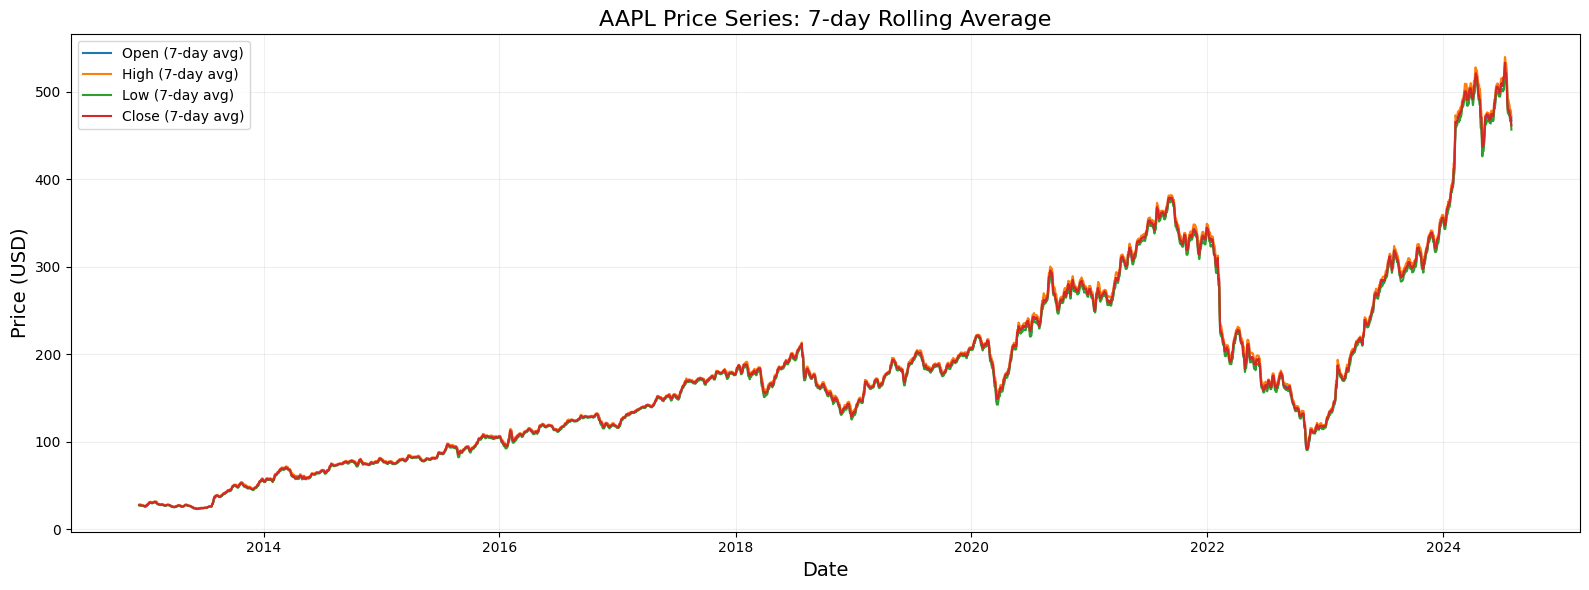

In [11]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_meta, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AAPL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'SMA_{sma_period}'] = talib.SMA(df[price_col], timeperiod=sma_period)
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'EMA_{ema_period}'] = talib.EMA(df[price_col], timeperiod=ema_period)


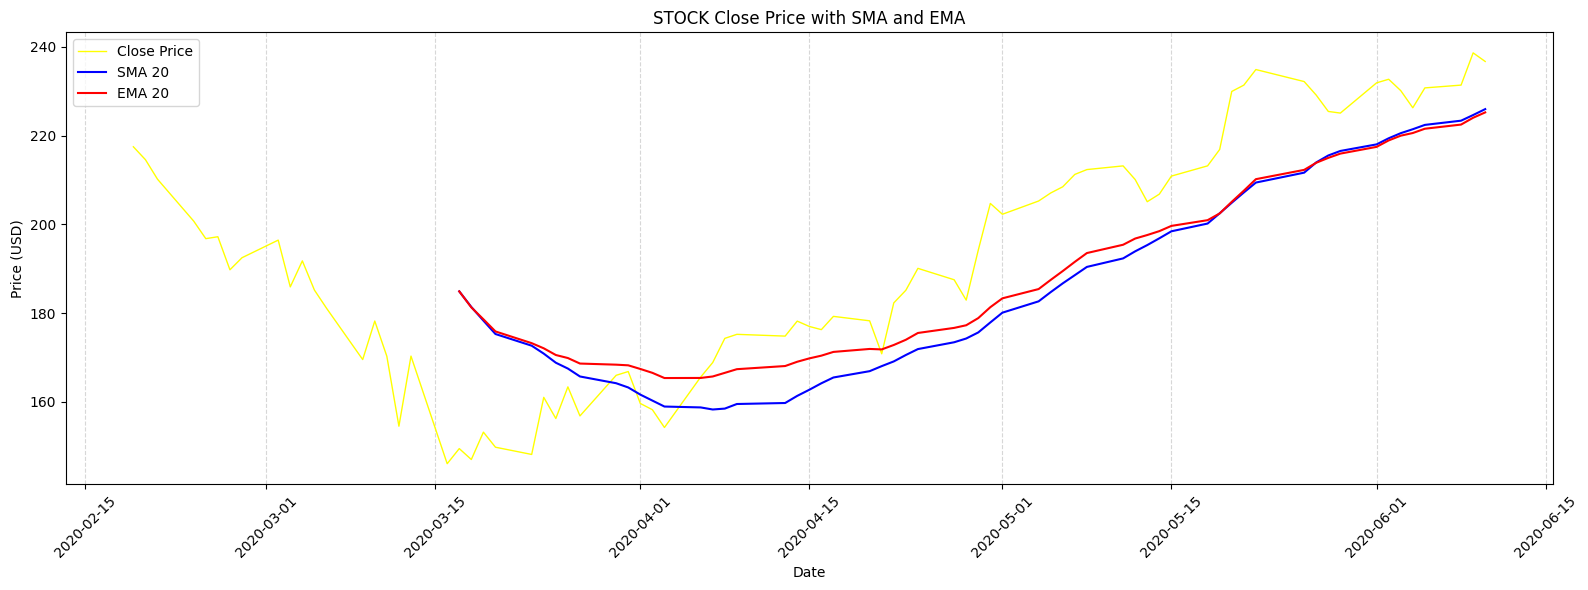

In [12]:
from src.plot_ma import plot_ma
plot_ma(df_meta_news, 'Close')

## Interpreting Technical Indicators with TA-Lib: SMA, EMA, and Price Trend

The graph above overlays three key lines for META stock:
- **Close Price** (black): The actual market closing price of META for each trading day.
- **SMA 20** (blue): The 20-day Simple Moving Average, which calculates the unweighted average of the previous 20 closing prices for each point in time.
- **EMA 20** (red): The 20-day Exponential Moving Average, which is similar to the SMA but gives more weight to recent prices, making it more responsive to new market information.

**TA-Lib** is a widely-used library for financial technical analysis. It computes indicators like SMA and EMA, which traders and analysts use to understand price trends, identify potential buy or sell signals, and smooth out short-term volatility in market data.

##### Both the SMA and EMA are trending up, confirming a bullish trend.

The lines stay in order: yellow (price) > red (EMA) > blue (SMA), a classic sign of a strong and established uptrend.

**Signals:**
When the price crosses above the moving averages, it’s often seen as a “buy” signal.
When it’s below, it’s a “sell” signal.

**Momentum:**
The bigger the gap between the yellow line and the moving averages, the stronger the trend (but sometimes this can mean the stock is “overbought” and may pull back soon).


### Key Insights from the Plot:
### 1. Early Period (February to mid-March 2020)

**Sharp Downtrend:**  
The price (yellow) falls steeply from around \$220 to about \$150, indicating a rapid selloff (likely the COVID-19 crash period).

Both SMA and EMA follow the drop, but EMA (red) reacts slightly quicker than SMA (blue).

---

### 2. Bottoming and Recovery (Late March to April)

The price bottoms out and begins a recovery, moving upward after mid-March.

The EMA turns up before the SMA, signaling early momentum in the rebound.

---

### 3. Sustained Uptrend (April to June)

The closing price rises steadily, from around \$160 to above \$230 by June.

Price stays above both SMA and EMA for most of this period, showing strong bullish momentum.

The gap widens between the closing price and the moving averages, a classic sign of a strong uptrend.

---

### What Does This Mean for Analysis?

**Trend Change Detection:**  
When the closing price crosses above the SMA and EMA, and both moving averages turn up, it’s a strong signal that a new uptrend has begun.  
The EMA, reacting faster, is useful for early detection of these turns.

**Momentum:**  
The larger the gap between the price and the averages, the stronger the trend—but this can also mean the price is “overbought” and due for a short pause or pullback.

**Bearish to Bullish Transition:**  
This chart captures a dramatic shift from bearish (downtrend) to bullish (uptrend), which is important for both trading strategies and machine learning feature engineering.

---

### Summary Statement

This chart of META shows a sharp fall followed by a strong and sustained recovery. The moving averages confirm and support the trend, with EMA (red) giving earlier signals. These patterns are important for spotting turning points and measuring the strength of trends—key features in technical analysis or data-driven stock modeling.





c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_rsi.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rsi_col] = talib.RSI(df[price_col], timeperiod=rsi_period)


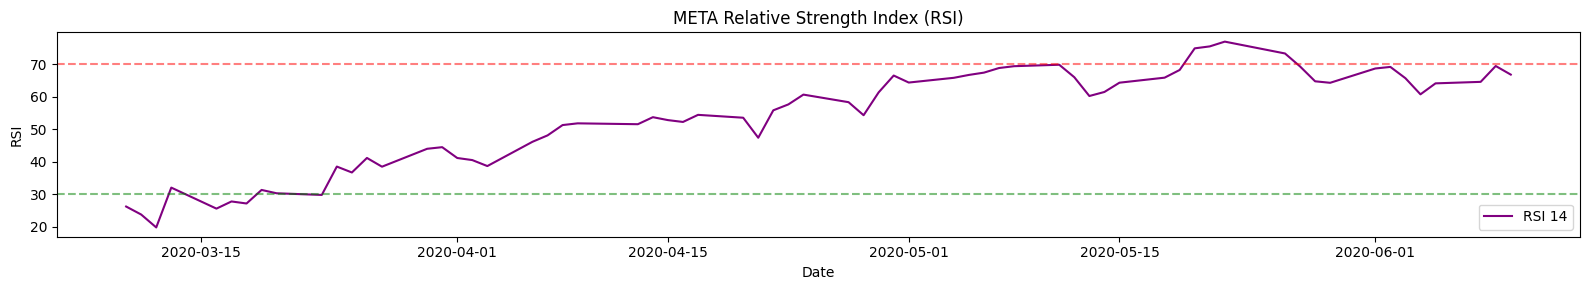

In [13]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_meta_news, price_col='Close', ticker_name='META')

## Interpreting the Relative Strength Index (RSI) with TA-Lib

The graph above visualizes the **14-day Relative Strength Index (RSI)** for AMZN, a momentum oscillator computed by TA-Lib. RSI is a popular indicator used by traders to measure the speed and magnitude of recent price changes.

- **RSI 14 (purple line):** This shows the relative strength over a 14-day period, ranging from 0 to 100.
- **Overbought threshold (red dashed line at 70):** When the RSI is above 70, it signals that the stock may be overbought or overvalued, and a price correction or pullback could be imminent.
- **Oversold threshold (green dashed line at 30):** When the RSI is below 30, it suggests that the stock may be oversold or undervalued, indicating a possible rebound or buying opportunity.

### Key Insights from the RSI Plot:

**Most of the period:**
RSI is between 50 and 60, meaning the stock is not overbought or oversold—just moving along in a healthy trend.

**End of the period:**
RSI climbs sharply and breaks above 70.

**This is a classic sign the stock is overbought** — it’s been gaining fast and could be due for a slowdown, sideways movement, or even a small pullback.

Doesn’t mean the stock must crash, but after hitting >70, **caution is wise** especially if you see other signals (like MACD or news sentiment) saying the same thing.





c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[macd_col] = macd
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[signal_col] = signal
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

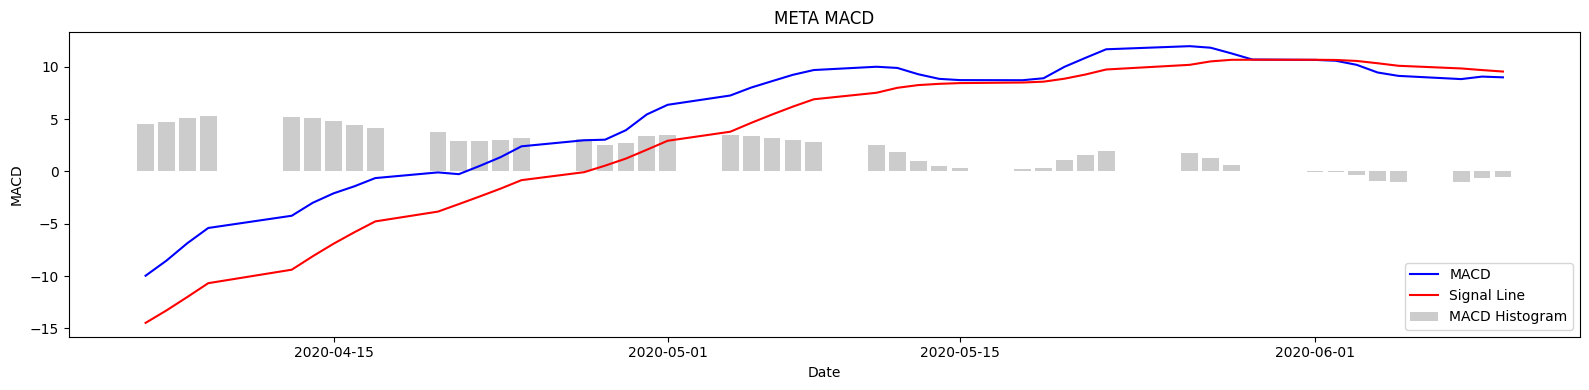

In [14]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_meta_news, price_col='Close', ticker_name='META')

## Interpreting the MACD Indicator with TA-Lib
What is MACD?
MACD (Moving Average Convergence Divergence) is a technical indicator used to spot trends and momentum in a stock’s price.

The chart has:

Blue line: The MACD value itself (difference between two moving averages of price)

Red line: The Signal Line (a moving average of the MACD)

Gray bars: The MACD Histogram (shows the difference between MACD and Signal Line; bigger bars = bigger momentum)

What Does Your Chart Show?
1. April–Early May
MACD and Signal Line both start high but begin to drop.

MACD (blue) is below the Signal Line (red) most of the time—bearish signal (price momentum is downward).

The MACD Histogram bars are mostly below zero (gray bars under the middle line), which confirms the weak/downward trend.

2. Mid–Late May
Both lines keep dropping, showing the stock is still losing momentum.

When the MACD gets closer to the Signal Line (the lines almost touch), the histogram bars get closer to zero—trend is slowing, possibly about to change.

3. Early June
MACD (blue) line starts to turn up just a bit, nearing the Signal Line.

Histogram bars flip from negative toward zero and even go slightly positive at the end, hinting momentum might be shifting upward.